In [62]:
provs = [
  {"prov_abbr": "AB", "prov_area_km2":  661848, "year_pop": [{"year": 2021, "pop":  4262635}, {"year": 2016, "pop":  4067175}]},
  {"prov_abbr": "BC", "prov_area_km2":  944735, "year_pop": [{"year": 2021, "pop":  5000879}, {"year": 2016, "pop":  4648055}]},
  {"prov_abbr": "MB", "prov_area_km2":  647797, "year_pop": [{"year": 2021, "pop":  1342153}, {"year": 2016, "pop":  1278365}]},
  {"prov_abbr": "NB", "prov_area_km2":   72908, "year_pop": [{"year": 2021, "pop":   775610}, {"year": 2016, "pop":   747101}]},
  {"prov_abbr": "NL", "prov_area_km2":  405212, "year_pop": [{"year": 2021, "pop":   510550}, {"year": 2016, "pop":   519716}]},
  {"prov_abbr": "NT", "prov_area_km2": 1346106, "year_pop": [{"year": 2021, "pop":    41070}, {"year": 2016, "pop":    41786}]},
  {"prov_abbr": "NS", "prov_area_km2":   55284, "year_pop": [{"year": 2021, "pop":   969383}, {"year": 2016, "pop":   923598}]},
  {"prov_abbr": "NU", "prov_area_km2": 2093190, "year_pop": [{"year": 2021, "pop":    36858}, {"year": 2016, "pop":    35944}]},
  {"prov_abbr": "ON", "prov_area_km2": 1076395, "year_pop": [{"year": 2021, "pop": 14223942}, {"year": 2016, "pop": 13448494}]},
  {"prov_abbr": "PE", "prov_area_km2":    5660, "year_pop": [{"year": 2021, "pop":   154331}, {"year": 2016, "pop":   142907}]},
  {"prov_abbr": "QC", "prov_area_km2": 1542056, "year_pop": [{"year": 2021, "pop":  8501833}, {"year": 2016, "pop":  8164361}]},
  {"prov_abbr": "SK", "prov_area_km2":  651036, "year_pop": [{"year": 2021, "pop":  1132505}, {"year": 2016, "pop":  1098352}]},
  {"prov_abbr": "YT", "prov_area_km2":  482443, "year_pop": [{"year": 2021, "pop":    40232}, {"year": 2016, "pop":    35874}]}
]

def get_decliner(arr):
    for prov in arr:
        num_pop = prov['year_pop'][0]['pop'] - prov['year_pop'][1]['pop']
        if num_pop < 0:          
            print(f"{prov['prov_abbr']} has a declined population of {abs(num_pop)} from {prov['year_pop'][1]['year']} to {prov['year_pop'][0]['year']}")
        
print(get_decliner(provs))

NL has a declined population of 9166 from 2016 to 2021
,NT has a declined population of 716 from 2016 to 2021
,None


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

cols = ['ResponseId', 'Country', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith']
df = pd.read_csv('./data/survey_results_public.csv', index_col='ResponseId', delimiter=',', usecols=cols)

display(df)

,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith
ResponseId,,,
1,NaN,NaN,NaN
2,United States of America,HTML/CSS;JavaScript;Python,Supabase
3,United States of America,Bash/Shell (all shells);Go,NaN
4,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis
5,Philippines,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL
...,...,...,...
89180,Brazil,HTML/CSS;Java;JavaScript;SQL;TypeScript,MongoDB;MySQL;PostgreSQL;SQLite
89181,Romania,Dart;Java;Python;SQL,PostgreSQL
89182,Israel,Assembly;Bash/Shell (all shells);C;C#;Python;R...,SQLite


In [16]:
df.dropna(subset=['Country', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith'], axis=0 , inplace=True)

filt_py = df['LanguageHaveWorkedWith'].str.contains('python', case=False)
filt_slqs = df['DatabaseHaveWorkedWith'].str.contains('Microsoft SQL Server', case=False)
df_py_sql = df[filt_py & filt_slqs]

num_resp = df['Country'].value_counts()
num_resp_py_sqls = df_py_sql['Country'].value_counts()


df_comb = pd.concat([num_resp, num_resp_py_sqls], axis=1).head(15)
df_comb.columns = ['num_resp', 'num_resp_py_sqls']
df_comb.replace(np.nan, 0, inplace=True)
df_comb['num_resp_py_sqls'] = df_comb['num_resp_py_sqls'].astype(int)

df_comb['pct'] = (df_comb['num_resp_py_sqls'] / df_comb['num_resp'] * 100).round(2)
df_comb = df_comb[['num_resp', 'num_resp_py_sqls', 'pct']].sort_values(by='pct', ascending=False)
df_comb


,num_resp,num_resp_py_sqls,pct
Italy,1604,221,13.78
United States of America,15110,1959,12.96
Australia,1723,223,12.94
Switzerland,974,117,12.01
Canada,2850,329,11.54
Brazil,1775,201,11.32
United Kingdom of Great Britain and Northern Ireland,4584,517,11.28
Netherlands,2013,212,10.53
Sweden,1295,132,10.19
Poland,2075,205,9.88


(0.0, 16.0)

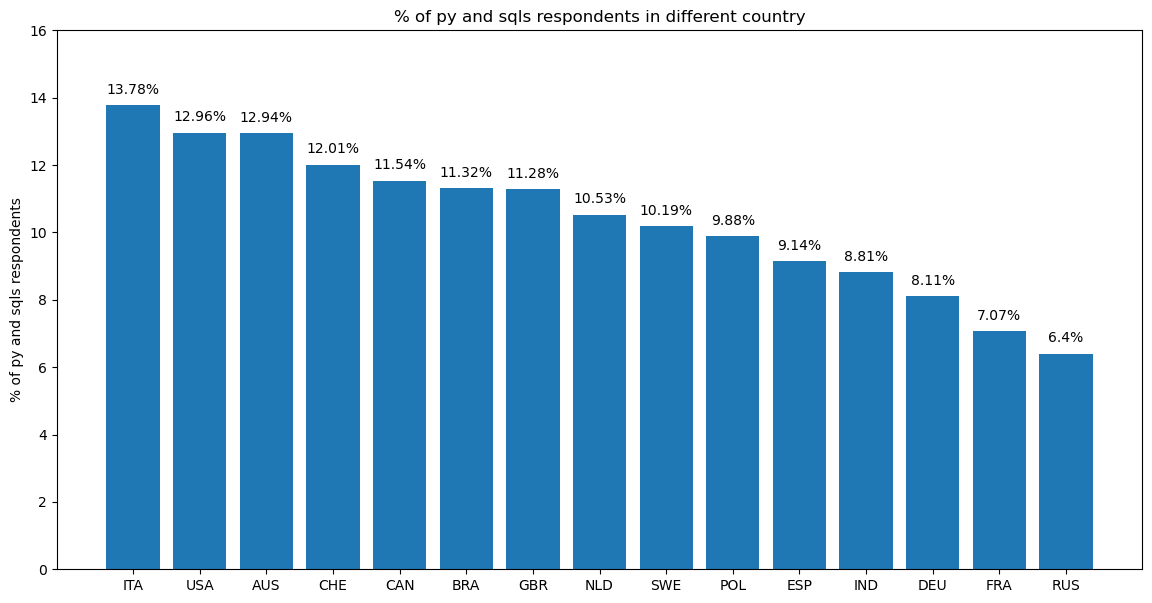

In [21]:
ctry_abbr = ['RUS', 'FRA', 'DEU', 'IND', 'ESP', 'POL', 'SWE', 'NLD', 'GBR', 'BRA', 'CAN', 'CHE', 'AUS', 'USA', 'ITA']

fig, ax = plt.subplots(figsize=(14, 7))

bar = ax.bar(ctry_abbr, df_sort)

ax.invert_xaxis()
ax.bar_label(bar, labels=[f'{n}%' for n in df_sort], padding=6)
ax.set_title('% of py and sqls respondents in different country')
ax.set_ylabel('% of py and sqls respondents')
ax.set_ylim(top=16)
